# Análise de Segmentação de Produtos em uma Loja de Varejo

Essa análise tem como objetivo exemplificar a segmentação de produtos em uma loja de varejo, com foco no departamento de bebidas. A segmentação será realizada considerando os produtos dentro desse departamento, buscando encontrar produtos que  frequentemente podem ser comprados juntos. Para isso, usou-se a análise de correlação entre os produtos. **Observação:** existe uma técnica chamada Market Basket Analysis muito empregada para análise de associação entre produtos, para acessar o artigo que aborda esse método acesse:[https://medium.com/@fagna.felix/market-basket-analysis](https://medium.com/@fagna.felix/market-basket-analysis-teoria-e-pr%C3%A1tica-aef4db83cc04)

## Contexto

Em lojas de varejo, compreender quais produtos são frequentemente adquiridos em conjunto pode ser crucial para estratégias de marketing, disposição de produtos nas prateleiras e até mesmo para otimização de estoque. No departamento de bebidas, por exemplo, entender quais produtos têm uma forte associação de compra pode influenciar decisões sobre como organizar o espaço da loja e quais promoções podem ser mais eficazes.

## Metodologia 

Começamos carregando os dados com os registros de vendas do departamento de bebidas e calculando a matriz de correlação entre os produtos. Em seguida, identificaremos os pares de produtos que apresentam uma correlação significativa, indicando uma tendência de serem comprados juntos. Por fim, visualizaremos os resultados de forma clara e interpretaremos as principais descobertas.

Vamos a análise!

In [1]:
import pandas as pd               # Manipulação e análise de dados
import matplotlib.pyplot as plt   # Visualização de dados
import seaborn as sns             # Visualização de dados mais elaborada baseada em matplotlib

In [2]:
# Carrega os dados do arquivo Excel
df = pd.read_excel("dados_compras.xlsx")

### Descrição dos dados

O total de produtos listados são 13. Cada linha representa um cliente, em que: 

$$
\begin{align*}
0 & : \text{Não comprou o produto} \\
1 & : \text{Comprou o produto}
\end{align*}
$$

A variável (produto) "refrigerante" refere-se a qualquer bebida carbonatada não alcoólica, gaseificada e adoçada, que não seja coca-cola e não pertença a nenhuma das demais categorias. 

In [3]:
display(df) # Exibe o conteúdo da base de dados

,Vinho,Uísque,Vodka,Martini,Cachaça,Cerveja,Coca-Cola,Suco de Frutas,Água,Energético,Milkshake,Refrigerante,Água de Coco
0,0,0,0,0,0,1,1,0,0,1,1,0,1
1,1,1,1,1,1,1,0,0,0,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,1,0,1,0,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,1,1,0,0,0,0,1,1,0,1
996,1,0,0,1,1,1,0,1,0,0,0,0,1
997,0,0,1,0,1,1,0,0,0,0,0,0,0
998,1,1,1,0,1,0,1,0,0,0,0,0,0


Os dados carregados como "dados_compras.xlsx" são simulados, considerando a dificuldade de se conseguir esses tipos de dados. Contudo, isso não invalida a aplicação real deste tipo de análise. Esse tipo de análide pode auxiliar as empresas na otimização de estoques, personalização de ofertas, identificação de tendências de compras e desenvolvimento de estratégias de marketing direcionadas.

Para mais detalhes de como esses dados foram gerados acesse o link: [https://github.com/Fagna/Projeto-Varejo/](https://github.com/Fagna/Projeto-Varejo/blob/main/C%C3%B3digo%20dados%20simulados.ipynb)
 
Mesmo sabendo que os dados são simulados, a boa prática da análise de dados exige que algumas verificações sejam feitas antes de aplicar a análise de correlação (que é objetivo da análise).

In [4]:
df.info() # Exibe informações do DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Vinho           1000 non-null   int64
 1   Uísque          1000 non-null   int64
 2   Vodka           1000 non-null   int64
 3   Martini         1000 non-null   int64
 4   Cachaça         1000 non-null   int64
 5   Cerveja         1000 non-null   int64
 6   Coca-Cola       1000 non-null   int64
 7   Suco de Frutas  1000 non-null   int64
 8   Água            1000 non-null   int64
 9   Energético      1000 non-null   int64
 10  Milkshake       1000 non-null   int64
 11  Refrigerante    1000 non-null   int64
 12  Água de Coco    1000 non-null   int64
dtypes: int64(13)
memory usage: 101.7 KB


A função verifica o número de linhas de cada coluna, se há colunas linhas nulas (count) e o tipo de dados.

### Quais produtos aparecem mais vezes e suas frequências


In [5]:
frequencias = df.sum().sort_values(ascending=False)  # Obtem frequência de cada produto de forma decrescente "ascending=False"
print("Produtos mais frequentes e suas frequências:")  # Imprime uma mensagem entre " "
print(frequencias)  # Exibe os produtos mais frequentes e suas frequências

Produtos mais frequentes e suas frequências:
Energético        520
Vinho             474
Cerveja           469
Vodka             466
Refrigerante      464
Uísque            459
Água de Coco      457
Cachaça           450
Suco de Frutas    444
Martini           438
Milkshake         438
Coca-Cola         435
Água              430
dtype: int64


A frequência pode não estar de acordo com a realidade. Conforme alertado, trata-se de dados simulados. 

### Matriz de correlação

A matriz de correlação é uma ferramenta estatística que mostra como as diferentes variáveis em um conjunto de dados estão relacionadas entre si. Neste contexto de segmentação de produtos, a matriz de correlação pode ser extremamente útil para identificar quais produtos estão frequentemente associados ou comprados juntos pelos clientes.

In [6]:
matriz_correlacao = df.corr() # Calcular a matriz de correlação entre os produtos
matriz_correlacao # Retorna a matriz calculada

,Vinho,Uísque,Vodka,Martini,Cachaça,Cerveja,Coca-Cola,Suco de Frutas,Água,Energético,Milkshake,Refrigerante,Água de Coco
Vinho,1.000000,0.415696,0.405952,0.385041,0.389275,0.424165,0.011352,-0.026023,-0.023543,0.046179,-0.018617,0.024352,-0.034647
Uísque,0.415696,1.000000,0.398686,0.384080,0.348716,0.372887,-0.002692,-0.027449,-0.009607,0.174005,-0.056796,0.036312,-0.031273
Vodka,0.405952,0.398686,1.000000,0.355124,0.404157,0.407509,-0.031176,-0.043994,-0.025834,0.091003,-0.020639,0.031257,-0.032041
Martini,0.385041,0.384080,0.355124,1.000000,0.384480,0.410261,0.005976,-0.005971,0.023043,0.101827,-0.031866,0.059686,0.039789
Cachaça,0.389275,0.348716,0.404157,0.384480,1.000000,0.374393,0.013177,-0.027510,-0.034511,0.040234,-0.036868,-0.011286,-0.030869
Cerveja,0.424165,0.372887,0.407509,0.410261,0.374393,1.000000,-0.008145,0.027280,0.029669,0.068667,-0.009782,0.017616,-0.025475
Coca-Cola,0.011352,-0.002692,-0.031176,0.005976,0.013177,-0.008145,1.000000,0.336393,0.354266,0.366602,0.327160,0.352539,0.361212
Suco de Frutas,-0.026023,-0.027449,-0.043994,-0.005971,-0.027510,0.027280,0.336393,1.000000,0.394666,0.407367,0.355069,0.379301,0.420562
Água,-0.023543,-0.009607,-0.025834,0.023043,-0.034511,0.029669,0.354266,0.394666,1.000000,0.389747,0.320241,0.390773,0.379084
Energético,0.046179,0.174005,0.091003,0.101827,0.040234,0.068667,0.366602,0.407367,0.389747,1.000000,0.343887,0.440374,0.559961


Para avaliar a matriz de correlação de forma mais rápida e visual, utilizaremos as bibliotecas matplotlib e seaborn.

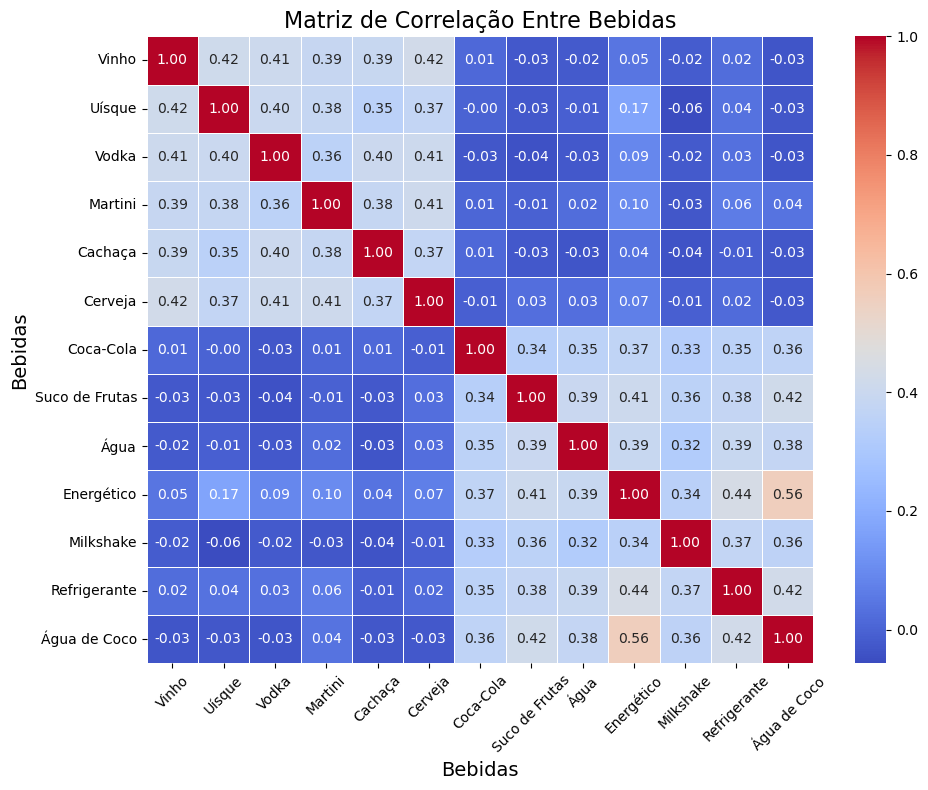

In [7]:
plt.figure(figsize=(10, 8))  # Define o tamanho da figura para o mapa de calor usando "matplotlib"
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)  # Cria um mapa de calor usando "seaborn"
plt.title('Matriz de Correlação Entre Bebidas', fontsize=16)  # Define o título do gráfico
plt.xlabel('Bebidas', fontsize=14)  # Define o rótulo do eixo x
plt.ylabel('Bebidas', fontsize=14)  # Define o rótulo do eixo y
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x em 45° para melhor legibilidade
plt.yticks(rotation=0)  # Não rotaciona os rótulos do eixo y
plt.tight_layout()  # Ajusta automaticamente a disposição dos elementos no gráfico para evitar sobreposição
plt.show()  # Exibe o mapa de calor

Na análise de correlação, geralmente, valores acima de 0,5 ou -0,5 (positivos ou negativos) são considerados como indicativos de uma correlação moderada a forte entre as variáveis. As bebidas "Energético e Água de Coco" são as únicas com correlação superior a 0,5. Energético e Refrigerante tem a segunda correção mais alta, porém abaixo de 0,5. Podemos utilizar um filtro para que retorne essa informação que acabamos de identificar.

In [8]:
# Filtrar os produtos que aparecem juntos (correlação maior que um limite)
limite_correlacao = 0.5  # Define um limite de correlação para determinar quais produtos aparecem juntos
pares_produtos_aparecem_juntos = []  # Inicializa uma lista para armazenar os pares de produtos que aparecem juntos

# Itera sobre as colunas da matriz de correlação
for i in range(len(matriz_correlacao.columns)):
    # Itera sobre as colunas seguintes na matriz de correlação
    for j in range(i+1, len(matriz_correlacao.columns)):
        # Verifica se a correlação entre os produtos é maior que o limite definido
        if matriz_correlacao.iloc[i, j] > limite_correlacao:
            # Adiciona o par de produtos à lista de pares que aparecem juntos
            pares_produtos_aparecem_juntos.append((matriz_correlacao.columns[i], matriz_correlacao.columns[j]))

# Imprime os pares de produtos que aparecem juntos, juntamente com a correlação
print("\nPares de produtos que aparecem juntos (correlação > {}):".format(limite_correlacao))
for par in pares_produtos_aparecem_juntos:  # Itera sobre os pares de produtos
    print(par)  # Exibe o par de produtos que aparecem juntos


Pares de produtos que aparecem juntos (correlação > 0.5):
('Energético', 'Água de Coco')


Resultado conforme haviamos discutido. Utilizando um fitro é possível quantificar essa correlação, ou seja, quantas vezes as bebidas foram compradas juntas.

In [9]:
# Calcular a frequência de ocorrência da combinação "Energético" e "Água de Coco"
frequencia_absoluta = df[(df['Energético'] == 1) & (df['Água de Coco'] == 1)].shape[0]#Calcula frequência absoluta da combinação
total_observacoes = df.shape[0]  # Calcula o total de observações no DataFrame
frequencia_percentual = (frequencia_absoluta / total_observacoes) * 100  # Calcula a frequência percentual da combinação

print("Frequência absoluta da combinação 'Energético' e 'Água de Coco':", frequencia_absoluta)  # Exibe a frequência absoluta
print("Frequência percentual da combinação 'Energético' e 'Água de Coco':", frequencia_percentual)  # Exibe a frequência em %

Frequência absoluta da combinação 'Energético' e 'Água de Coco': 377
Frequência percentual da combinação 'Energético' e 'Água de Coco': 37.7


Ou seja, dos 1000 registros de clientes que fizeram compras 377 deles compraram Energético e Água de Coco. Por curiosidade se verificarmos as quantidade de vezes que Energético e Refrigerante foram comprados juntos, veremeos que foi uma quantidade de vezes menor, já que a correlação é de 0,44. 

In [10]:
# Calcular a frequência de ocorrência da combinação "Energético" e "Refrigerante"
frequencia_absoluta = df[(df['Energético'] == 1) & (df['Refrigerante'] == 1)].shape[0]
total_observacoes = df.shape[0]
frequencia_percentual = (frequencia_absoluta / total_observacoes) * 100

print("Frequência absoluta da combinação 'Energético' e 'Refrigerante':", frequencia_absoluta)
print("Frequência percentual da combinação 'Energético' e 'Refrigerante':", frequencia_percentual)


Frequência absoluta da combinação 'Energético' e 'Refrigerante': 351
Frequência percentual da combinação 'Energético' e 'Refrigerante': 35.099999999999994


A diferença entre a quantidade de vezes que Energético e Água de Coco foram comprados juntos comparado com a quantidade de vezes que Energético e Refrigerante foram comprados juntos de 26 veses. Parece muito pouco, mas estatisticamente Energético e Refrigerante não possuem correlação significa para serem considerados bebidas que frequentemente são compradas juntas.

Uma correlação de 0,44 geralmente indicaria uma relação moderada entre as variáveis, mas a significância depende do contexto específico da análise. Em alguns contexto, pode ser importante considerar não apenas os valores de correlação, mas também as frequências absolutas de ocorrência ao interpretar as relações entre os produtos.

# Conclusão

Considerando a significância estatística da relação entre as bebidas Energético e Água de Coco, é recomendável planejar estratégias de vendas que levem em consideração a associação dessas bebidas. Posicionar esses itens próximo um do outro nas prateleiras pode potencializar as vendas. Além disso, é importante observar a proximidade do refrigerante, que também pode influenciar o comportamento de compra dos consumidores.

**Considerações:** esse foi apenas um exemplo de uma aplicação usando dados simulados. Esse método de segmentar produtos com base na correlação é simples e pode ser aplicado a diversas situações. A análise de correlação fornece uma direção, contudo é muito limitada. Atualmente na área de varejo o método comumente empregado para análise de cesta de mercado é a regra de associação usando os algoritmos Apriori e FP-Growth.

Para acessar o artigo que aborda o método Market Basket Analysis acesse: [https://medium.com/@fagna.felix/market-basket-analysis](https://medium.com/@fagna.felix/market-basket-analysis-teoria-e-pr%C3%A1tica-aef4db83cc04)